In [1]:
import pandas_datareader as pdr
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns

from matplotlib.pyplot import plot
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

#CSV Stuff
import csv

%matplotlib inline
import mpld3
#mpld3.enable_notebook()

register_matplotlib_converters()

# Auswertung

In [2]:
# Daten einlesen
dir_var = "data/"
rawData = pd.read_csv(dir_var + "sti.csv", sep=",")

In [3]:
# Zählen und ausgeben
rawData.count()

to             80
resultsSize    80
startTime      80
maxWorkers     80
time           80
dtype: int64

In [4]:
# Überprüfe Worker
rawData.maxWorkers.value_counts()

16    5
15    5
14    5
13    5
12    5
11    5
10    5
9     5
8     5
7     5
6     5
5     5
4     5
3     5
2     5
1     5
Name: maxWorkers, dtype: int64

In [5]:
# Lese MaxWokers global aus
globalMaxWorkers = rawData.maxWorkers.max()

In [6]:
# Überprüfe ob alle Ergebnisse übereinstimmen
rawData.resultsSize.value_counts()

58084    80
Name: resultsSize, dtype: int64

In [7]:
#Mean und Median berechnen
medianData = rawData.groupby("maxWorkers").median()
meanData   = rawData.groupby("maxWorkers").mean()

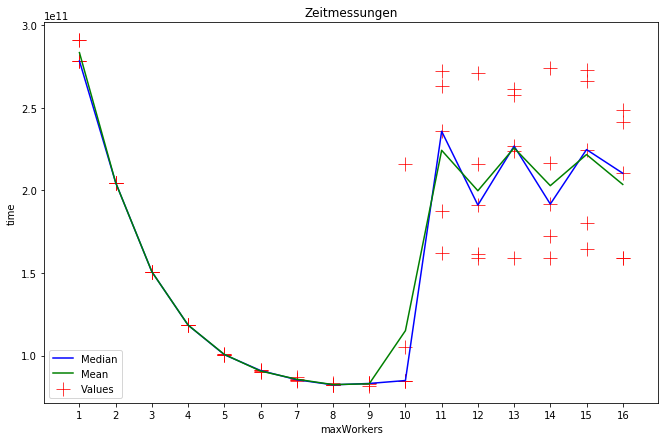

In [16]:
# Zeichne Ergebnisse

_ = plt.figure(figsize=(11,7))
_ = plt.xticks(np.arange(0, globalMaxWorkers+1, 1.0))
_ = plt.title("Zeitmessungen")

_ = sns.scatterplot(x = rawData.maxWorkers, y = rawData.time, marker="+", color="red", s=200, label="Values")
#_ = sns.lineplot(x = rawData.maxWorkers, y = rawData.time, marker="o", color="green")

_ = sns.lineplot(x=medianData.index, y=medianData.time, color="blue", label="Median")
_ = sns.lineplot(x=meanData.index, y=meanData.time, color="green", label="Mean")

_ = plt.savefig(dir_var + 'time.png')

In [9]:
# Speedup berechnen
firstTimeMedian = medianData.time.iloc[0]
firstTimeMean   = meanData.time.iloc[0]

medianData["speedUp"] = firstTimeMedian / medianData.time
meanData["speedUp"]   = firstTimeMean / meanData.time

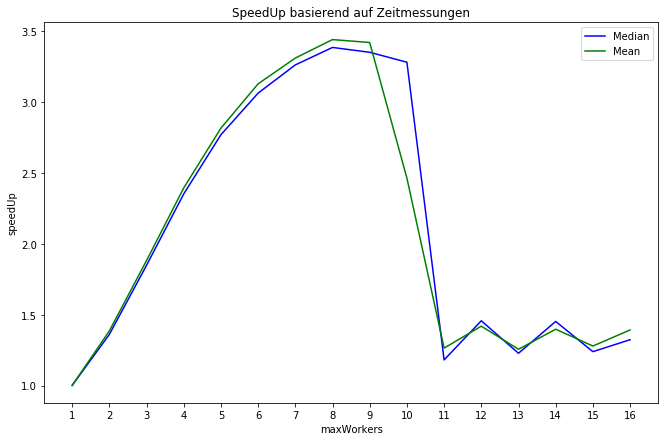

In [17]:
# Zeichne Ergebnisse

_ = plt.figure(figsize=(11,7))
_ = plt.xticks(np.arange(0, globalMaxWorkers+1, 1.0))
_ = plt.title("SpeedUp basierend auf Zeitmessungen")

#_ = sns.lineplot(x=medianData.index, y=medianData.index, color="orange", label="Linear Speedup")

_ = sns.lineplot(x=medianData.index, y=medianData.speedUp, color="blue", label="Median")
_ = sns.lineplot(x=meanData.index, y=meanData.speedUp, color="green", label="Mean")

plt.savefig(dir_var + 'speedUp.png')